'A simple 2D CNN for MNIST digit recognition',
Reference: https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a

In [24]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


X_train shape:(60000, 28, 28), y_train shape:(60000,)
X_test shape:(10000, 28, 28), y_test shape:(10000,)


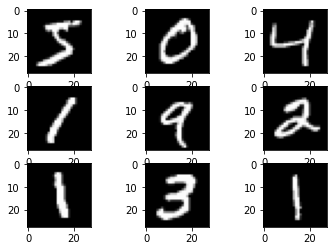

In [25]:
#loading dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print("\nX_train shape:{0}, y_train shape:{1}".format(X_train.shape,y_train.shape))
print("X_test shape:{0}, y_test shape:{1}".format(X_test.shape,y_test.shape))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    
#print(X_train[0])

In [26]:
# Reshaping and pre processing
print('Image data format: ',keras.backend.image_data_format())
#print(X_train[0])
# As image data format is 'channels_last' we reshape X_train and X_test to (m,height,width,channels),
# where m is number of examples(training/testing)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

#print(X_train[0])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Scaling
X_train /=255
X_test = X_test/255.0
print('X_train.shape:',X_train.shape,'\nX_test.shape:',X_test.shape)

Image data format:  channels_last
X_train.shape: (60000, 28, 28, 1) 
X_test.shape: (10000, 28, 28, 1)


In [27]:
y_test_original=y_test
#Convert y_train and y_test to categorical data(binary class matrices) from class vectors
num_category = 10
y_train = keras.utils.to_categorical(y_train,num_category)
y_test = keras.utils.to_categorical(y_test,num_category)

In [28]:
#Build,compile and fit keras Model
shape=(X_train.shape[1],X_train.shape[2],1)
model = keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_category,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)



In [29]:
model_log = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2221 - accuracy: 0.9308
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0860 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0672 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0540 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0464 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0428 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0382 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0363 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9929


[0.024396810680627823, 0.992900013923645]

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [32]:
y_predicted=model.predict(X_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_test_original.shape)

(10000,)


In [33]:
#Compute comfusion matrix(to check how many erroneous or correct predictions)
cm=tf.math.confusion_matrix(labels=y_test_original,predictions=y_predicted_labels)
print(cm)


tf.Tensor(
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2    0 1025    0    0    0    0    5    0    0]
 [   0    0    2 1003    0    4    0    0    1    0]
 [   2    0    0    0  974    0    2    0    0    4]
 [   1    0    0    4    0  883    2    0    1    1]
 [   2    3    0    0    1    1  951    0    0    0]
 [   0    2    6    0    0    0    0 1020    0    0]
 [   1    0    3    1    1    0    0    1  966    1]
 [   4    0    0    0    3    3    0    0    5  994]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth value')

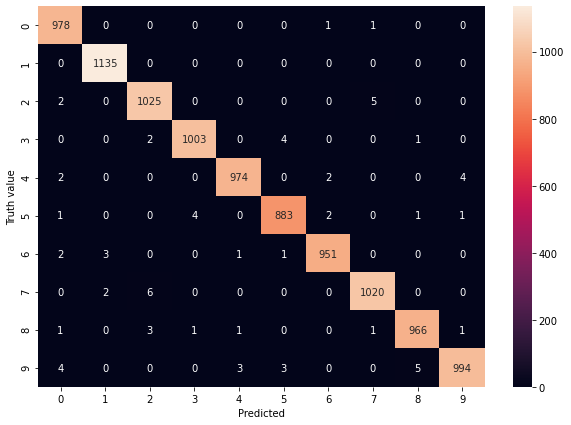

In [34]:
#use seaborn to visualize above matrix using heatmap
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth value')